In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
# create two dimensional correlated data
np.random.seed(0)
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=500)
data = pd.DataFrame(data, columns=['x', 'y'])
data.head()




,x,y
0,-4.043801,-1.574511
1,-3.146465,0.932162
2,-3.654563,-2.919911
3,-2.013850,-1.176148
4,0.042516,0.480321


In [ ]:
# plot the data
plt.scatter(data['x'], data['y'], alpha=0.5)
plt.axis('equal')
plt.show()


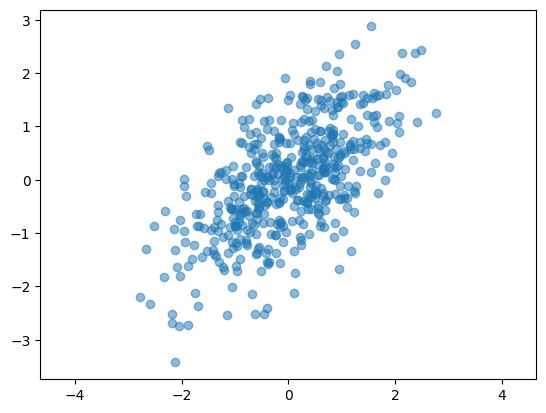

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

plt.scatter(data_standardized[:,0], data_standardized[:,1], alpha=0.5)
plt.axis('equal')
plt.show()

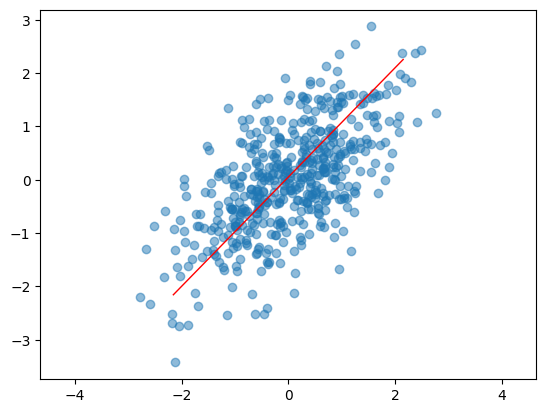

In [35]:
# Plot first principal component
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# standardize the data

pca.fit(data_standardized)
first_pc = pca.components_[0]
plt.scatter(data_standardized[:,0], data_standardized[:,1], alpha=0.5)
plt.axis('equal')
xlim = plt.xlim()
ylim = plt.ylim()
plt.plot([first_pc[0]*xlim[0], first_pc[0]*xlim[1]], [first_pc[1]*xlim[0], first_pc[1]*ylim[1]], color='red', lw=1)
plt.show()



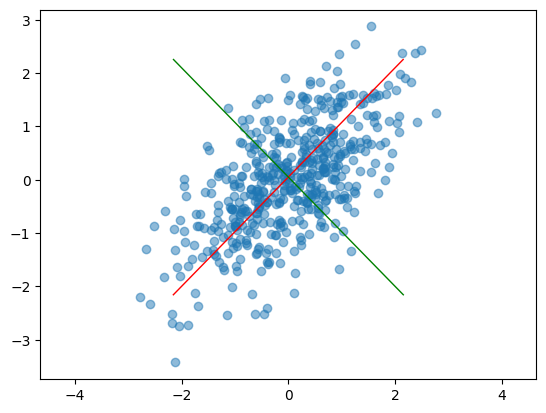

In [38]:
plt.scatter(data_standardized[:,0], data_standardized[:,1], alpha=0.5)
plt.axis('equal')
plt.plot([first_pc[0]*xlim[0], first_pc[0]*xlim[1]], [first_pc[1]*xlim[0], first_pc[1]*ylim[1]], color='red', lw=1)
# plot second principal component
second_pc = pca.components_[1]
plt.plot([second_pc[0]*xlim[0], second_pc[0]*xlim[1]], [second_pc[1]*xlim[0], second_pc[1]*ylim[1]], color='green', lw=1)
plt.show()

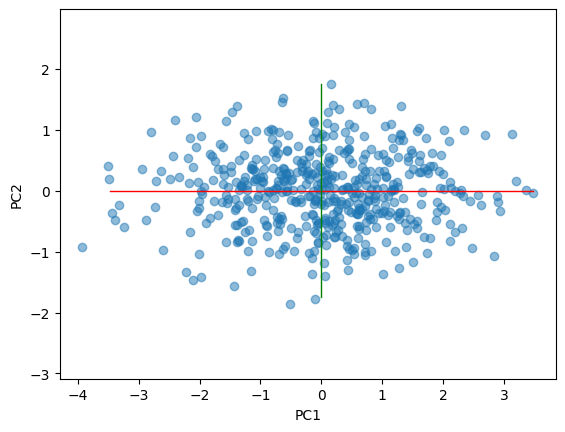

In [47]:
# Rotate the data
data_rotated = np.dot(data_standardized, pca.components_.T)
max_x = max(data_rotated[:,0])
max_y = max(data_rotated[:,1])

plt.scatter(data_rotated[:,0], data_rotated[:,1], alpha=0.5)
plt.axis('equal')
# plot first principal component
plt.plot([-max_x, max_x], [0, 0], color='red', lw=1)

# plot second principal component
plt.plot([0, 0], [-max_y, max_y], color='green', lw=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

c:\Users\vinor\Desktop\Develhope\projects\EDU-PCA\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


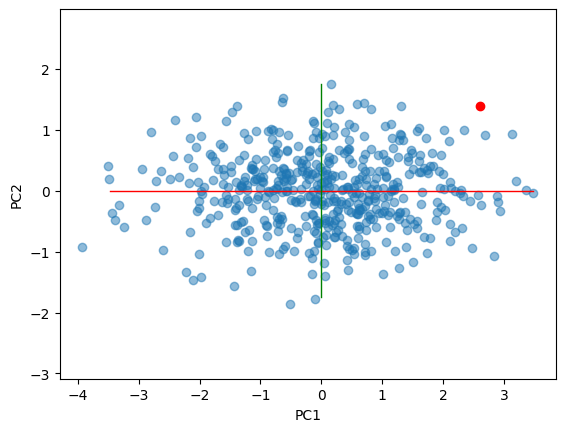

In [49]:
# create and plot one new data point
new_data = np.array([[2, 4]])
new_data_standardized = scaler.transform(new_data)
new_data_rotated = np.dot(new_data_standardized, pca.components_.T)
 #plot it
plt.scatter(data_rotated[:,0], data_rotated[:,1], alpha=0.5)
plt.axis('equal')
plt.plot(new_data_rotated[0,0], new_data_rotated[0,1], 'or')
plt.plot([-max_x, max_x], [0, 0], color='red', lw=1)
plt.plot([0, 0], [-max_y, max_y], color='green', lw=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
